In [142]:
import pandas as pd
import numpy as np
import missingno as msno
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv("Datasets/MoviesOnStreamingPlatforms_updated.csv")

In [94]:
df = pd.DataFrame(df)
df

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,7,8,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,8,9,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,9,10,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


In [95]:
df['Age'].unique()

array(['13+', '18+', '7+', nan, 'all', '16+'], dtype=object)

In [96]:
df['Rotten Tomatoes'].unique()

array(['87%', '84%', '96%', '97%', '95%', '89%', '100%', '93%', '88%',
       '91%', '86%', '92%', '90%', '94%', '80%', '81%', '77%', '85%',
       '79%', '67%', '83%', '75%', '98%', '65%', '71%', '82%', '99%',
       '68%', '73%', '66%', '78%', '63%', '76%', '74%', '55%', '70%',
       '61%', '69%', '40%', '43%', '72%', '60%', '39%', '62%', '31%',
       '64%', '59%', '35%', '52%', '46%', '48%', '49%', '56%', '57%',
       '41%', '53%', '23%', '28%', '50%', '36%', nan, '33%', '54%', '58%',
       '17%', '27%', '42%', '38%', '30%', '45%', '47%', '26%', '29%',
       '24%', '20%', '44%', '51%', '34%', '19%', '37%', '32%', '22%',
       '16%', '11%', '25%', '13%', '15%', '12%', '18%', '8%', '9%', '14%',
       '6%', '21%', '5%', '10%', '4%', '7%', '3%', '2%'], dtype=object)

In [97]:
#change percentages to numeric maybe but need to deal with NaN variables

missingdata_df = df.columns[df.isnull().any()].tolist()
missingdata_df

['Age',
 'IMDb',
 'Rotten Tomatoes',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

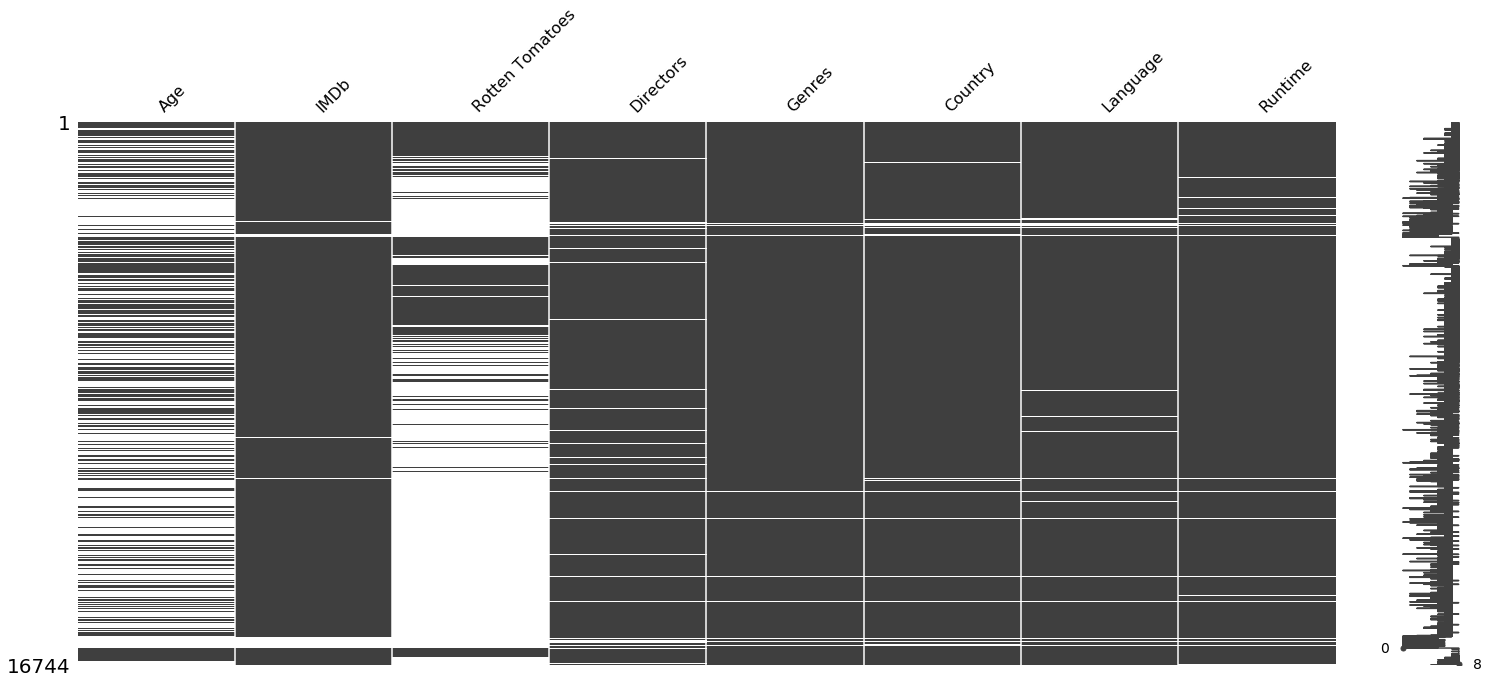

In [98]:
#Columns with missing values

msno.matrix(df[missingdata_df])

In [99]:
#For new df, drop any null values
#Year, IMbd Rating, Rotten Tomatoes rating
df_2 = df.dropna( axis=0, how='any', thresh=None, subset=None, inplace=False)
df_2.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [100]:
##check missing values one more time
# ms_df2 = df_2.columns[df_2.isnull().any()].tolist()
# ms_df2

#no nan values so we are good to go

In [101]:
df_2.dtypes

Unnamed: 0           int64
ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object

In [102]:
df_2['IMDb'] = df_2['IMDb'].astype(float)

C:\Users\Irwin\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [103]:
## Reference: https://stackoverflow.com/questions/25669588/convert-percent-string-to-float-in-pandas-read-csv
df_2['Rotten Tomatoes'] = df_2['Rotten Tomatoes'].str.rstrip('%').astype('float')


C:\Users\Irwin\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [104]:
df_2.dtypes

Unnamed: 0           int64
ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes    float64
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object

In [105]:
#Compare available movies by year vs IMDB and Rotten Tomatoes
df_2.head(10)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87.0,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87.0,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84.0,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96.0,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97.0,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97.0,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,6,7,The Pianist,2002,18+,8.5,95.0,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,7,8,Django Unchained,2012,18+,8.4,87.0,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,8,9,Raiders of the Lost Ark,1981,7+,8.4,95.0,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,9,10,Inglourious Basterds,2009,18+,8.3,89.0,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


In [106]:
#Collect Year, IMDB, and Rotten Tomatoes
by_year = pd.DataFrame(df_2, columns=["Year", "IMDb", "Rotten Tomatoes"])
by_year.head(10)

,Year,IMDb,Rotten Tomatoes
0,2010,8.8,87.0
1,1999,8.7,87.0
2,2018,8.5,84.0
3,1985,8.5,96.0
4,1966,8.8,97.0
5,2018,8.4,97.0
6,2002,8.5,95.0
7,2012,8.4,87.0
8,1981,8.4,95.0
9,2009,8.3,89.0


In [118]:
by_year_imdb = pd.DataFrame(by_year, columns=["Year", "IMDb"])
by_year_imdb = pd.DataFrame(by_year_imdb.groupby("Year").mean()).reset_index()
by_year_imdb = pd.DataFrame(by_year_imdb.sort_values(by="IMDb",ascending=False))
by_year_imdb = pd.DataFrame(by_year_imdb).reset_index()
by_year_imdb = by_year_imdb.drop(["index"], axis=1) 
by_year_imdb

,Year,IMDb
0,1902,8.200000
1,1920,8.100000
2,1951,7.550000
3,1966,7.500000
4,1964,7.466667
5,1968,7.457143
6,1960,7.400000
7,1950,7.300000
8,1957,7.300000
9,1942,7.300000


In [119]:
by_year_tomatoes = pd.DataFrame(by_year, columns=["Year", "Rotten Tomatoes"])
by_year_tomatoes = pd.DataFrame(by_year_tomatoes.groupby("Year").mean()).reset_index()
by_year_tomatoes = pd.DataFrame(by_year_tomatoes.sort_values(by="Rotten Tomatoes",ascending=False))
by_year_tomatoes = pd.DataFrame(by_year_tomatoes).reset_index()
by_year_tomatoes = by_year_tomatoes.drop(["index"], axis=1) 
by_year_tomatoes

,Year,Rotten Tomatoes
0,1902,100.000000
1,1920,100.000000
2,1922,100.000000
3,1957,100.000000
4,1937,99.000000
5,1955,96.333333
6,1925,95.500000
7,1932,93.000000
8,1915,93.000000
9,1949,93.000000


In [120]:
X_1 = by_year_imdb["Year"].values
y_1 = by_year_imdb["IMDb"]

X_2 = by_year_tomatoes["Year"].values
y_2 = by_year_tomatoes["Rotten Tomatoes"].values

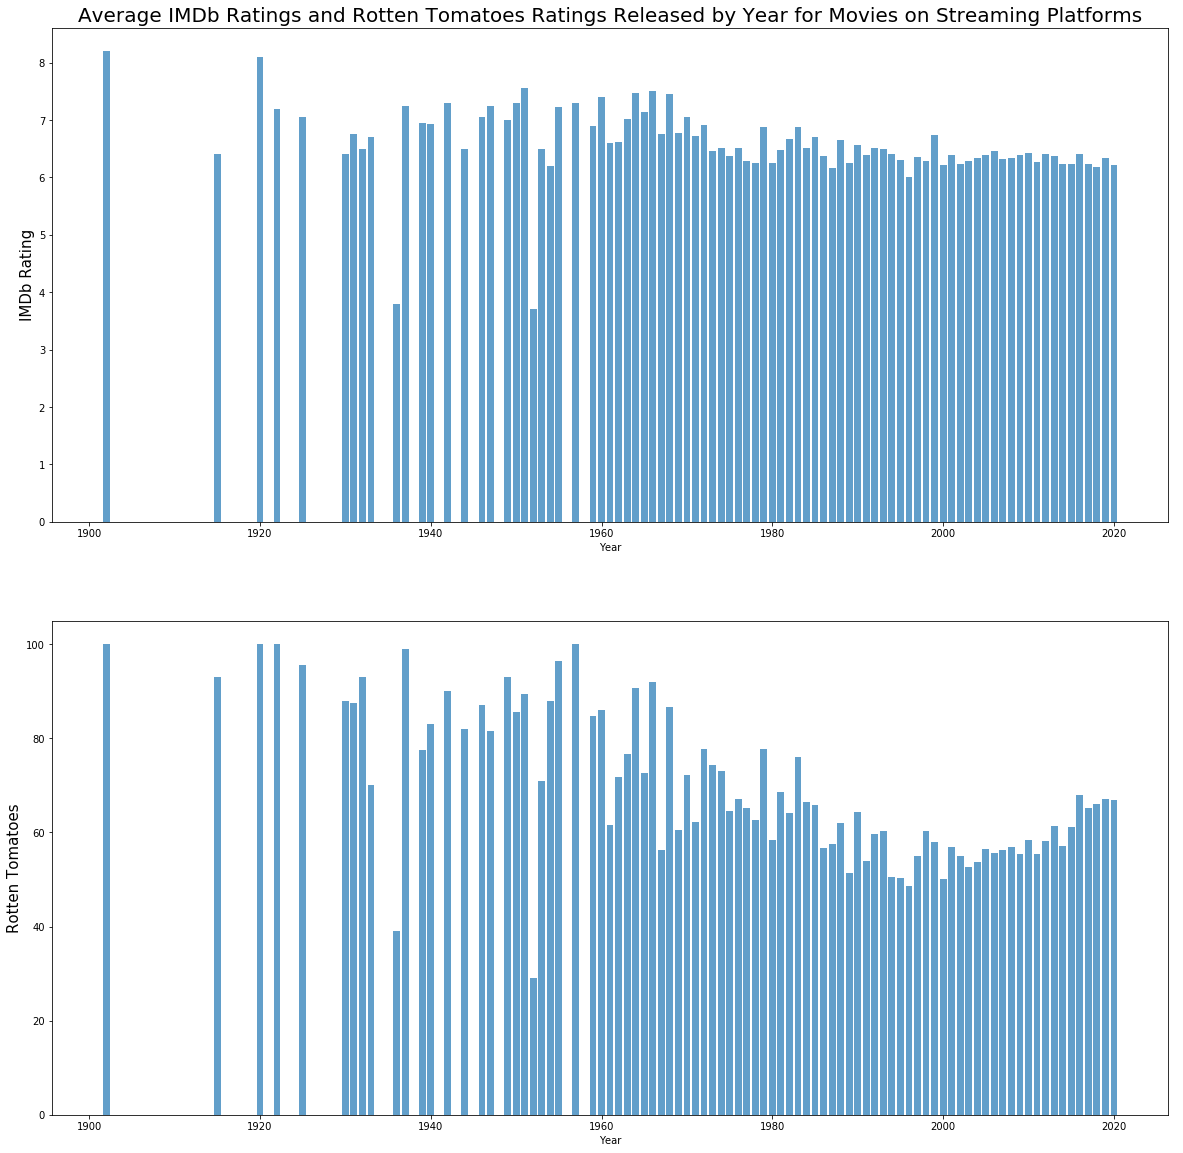

In [152]:
#Make a subplot, one plot with IMDB ratings, one with RT points
f = plt.figure(figsize=(20,20))
plt.title("Average IMDb Ratings and Rotten Tomatoes Ratings Released by Year for Movies on Streaming Platforms", size=20)
plt.axis('off')

f.add_subplot(2,1,1)
plt.bar(X_1, y_1, alpha= 0.7)
plt.xlabel("Year")
plt.ylabel("IMDb Rating", size = 15)

f.add_subplot(2,1, 2)
plt.bar(X_2, y_2, alpha= 0.7)
plt.xlabel("Year")
plt.ylabel("Rotten Tomatoes", size = 15)

plt.savefig("Visualizations/Avg_IMDb_RT_Year")
plt.show()


In [159]:
avg_imdb = by_year_imdb["IMDb"].mean()
avg_tomatoes = by_year_tomatoes["Rotten Tomatoes"].mean()

avg_tomatoes

69.83743064259134

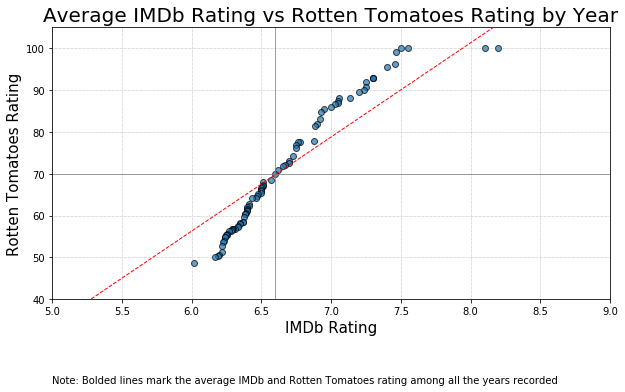

In [175]:
#Plotting IMDb and RT 
plt.figure(figsize=(10,5))
plt.scatter(y_1, y_2, marker = 'o', edgecolor = 'black', alpha = 0.7)
plt.title("Average IMDb Rating vs Rotten Tomatoes Rating by Year", size = 20)

plt.xlabel("IMDb Rating", size = 15)
plt.ylabel("Rotten Tomatoes Rating", size = 15)
plt.xlim(5,9)
plt.ylim(40,105)

# Create gridlines
plt.axhline(y=69.9, color='grey', zorder=1, linewidth=0.75)
plt.axvline(x=6.6, color='grey', zorder=1, linewidth=0.75)
plt.grid(color = "grey",linestyle = 'dotted', linewidth = 0.5)

# Create a regression line
(slope, intercept, _, _, _) = linregress(y_1, y_2)
fit = slope * y_1 + intercept
plt.plot(y_1, fit, '--', zorder=3, color="red", linewidth=1)
plt.text(5, 20, "Note: Bolded lines mark the average IMDb and Rotten Tomatoes rating among all the years recorded",
         fontsize=10)


plt.savefig("Visualizations/IMDb_Tomatoes_Scatter_and_Regression_Line")
plt.show()